# EDA

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from Scrapper import extract_imdb_reviews

In [16]:
# Scrape the reviews
url = "https://www.imdb.com/title/tt16311594/reviews/"
reviews = extract_imdb_reviews(url)

In [17]:
# for i, review in enumerate(reviews[:5], 1):
#     print(f"{i}. {review}\n")

In [18]:
len(reviews)

294

In [19]:
df = pd.DataFrame(np.array(reviews), columns=['Reviews'])

In [20]:
df.head()

,Reviews
0,"Firstly, the music. Oh boy!I came expecting en..."
1,...and I went into this expecting a Hollywood ...
2,F1 has you on the edge of your seat 100% of th...
3,Just got out of the theater. It was a full the...
4,"As a longtime F1 fan, F1: The Movie completely..."


In [26]:
df['Word Count'] = df['Reviews'].apply(lambda x: len(x.split()))

In [27]:
df.head()

,Reviews,Word Count
0,"Firstly, the music. Oh boy!I came expecting en...",297
1,...and I went into this expecting a Hollywood ...,123
2,F1 has you on the edge of your seat 100% of th...,109
3,Just got out of the theater. It was a full the...,147
4,"As a longtime F1 fan, F1: The Movie completely...",155


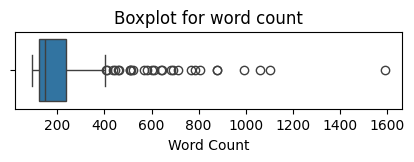

In [32]:
plt.figure(figsize=(5,1))
plt.title('Boxplot for word count')
sns.boxplot(data = df, x = 'Word Count')
plt.show()

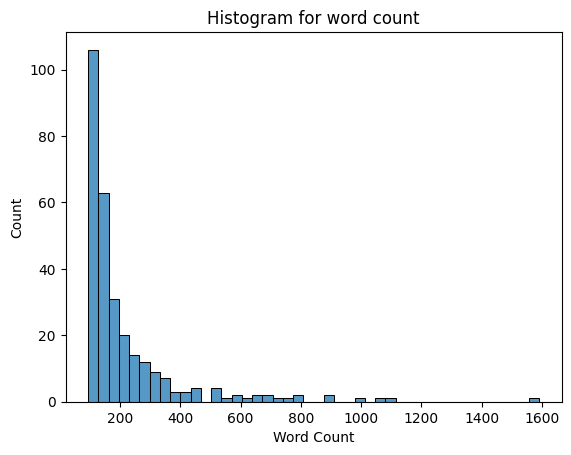

In [36]:
plt.title('Histogram for word count')
sns.histplot(data = df, x = 'Word Count')
plt.show()

## Counting Stopwords

In [37]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [regex]
   ---------------------------------------- 0/2 [regex]
   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   --

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\octam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [40]:
stopwords.words('english'),len(stopwords.words('english'))

(['a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  'her',
  'here',
  'hers',
  'herself',
  "he's",
  'him',
  'himself',
  'his',
  'how',
  'i',
  "i'd",
  'if',
  "i'll",
  "i'm",
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  "i've",
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'mys

In [41]:
stop_words = stopwords.words('english')

In [42]:
df['Stopwords Count'] = df['Reviews'].apply(lambda x:len([x for x in x.split() if x in stop_words]))

In [43]:
df.head()

,Reviews,Word Count,Stopwords Count
0,"Firstly, the music. Oh boy!I came expecting en...",297,93
1,...and I went into this expecting a Hollywood ...,123,52
2,F1 has you on the edge of your seat 100% of th...,109,44
3,Just got out of the theater. It was a full the...,147,54
4,"As a longtime F1 fan, F1: The Movie completely...",155,61


In [47]:
df.describe()

,Word Count,Stopwords Count
count,294.000000,294.000000
mean,217.047619,85.982993
std,185.101110,75.135348
min,94.000000,0.000000
25%,120.000000,49.000000
50%,146.500000,59.500000
75%,234.500000,92.750000
max,1591.000000,667.000000


# NLP